In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_1 = pd.read_csv('hcmv-263hxkx-1qhtfgz.txt')

In [3]:
# from original data set, n = 296 (Palindromes), N = 229354 (Base pairs)
n, N = 296, 229354

In [4]:
# Generate three uniformed distributed 
samples = [pd.Series(np.random.uniform(0,N,n)).sort_values() for i in range(3)]

# Random Scatter

Text(0.5,1,'Location of Palindromes')

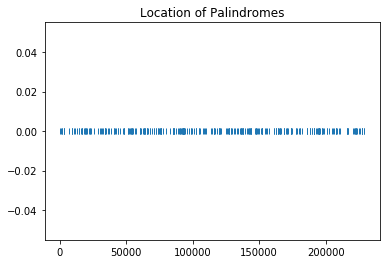

In [5]:
#'Location of Palindromes'
plt.plot(data_1.location, np.zeros_like(data_1.location) + 0, '|')
plt.title('Location of Palindromes')

Text(0.5,1,'similated data 1')

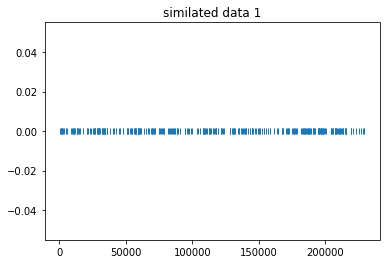

In [6]:
# Location of three simulated samples
#for i in samples:
plt.plot(samples[0], np.zeros_like(samples[0]) + 0, '|')
plt.title('similated data 1')

Text(0.5,1,'similated data 2')

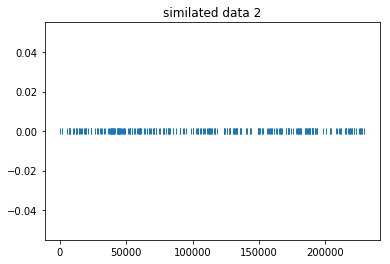

In [7]:
plt.plot(samples[1], np.zeros_like(samples[1]) + 0, '|')
plt.title('similated data 2')

Text(0.5,1,'similated data 3')

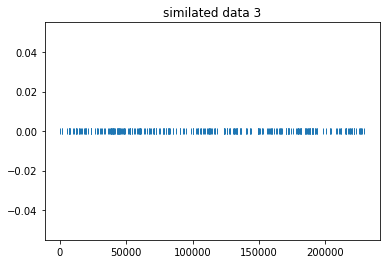

In [8]:
plt.plot(samples[1], np.zeros_like(samples[2]) + 0, '|')
plt.title('similated data 3')

Text(0.5,0,'Base Pair')

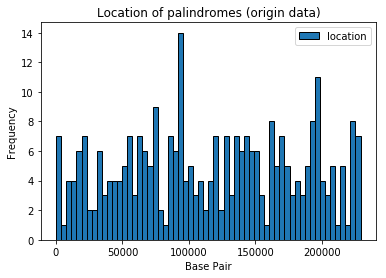

In [9]:
data_1.plot(kind="hist", bins = 60, edgecolor = 'k',title='Location of palindromes (origin data)')
plt.xlabel("Base Pair")


Text(0.5,0,'Base Pair')

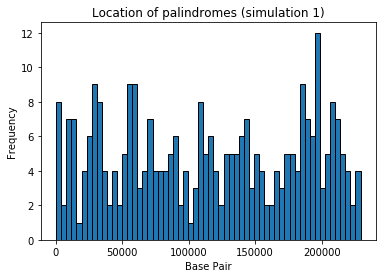

In [10]:
pd.Series(samples[0]).sort_values().reset_index()[0].plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 1)'))
plt.xlabel("Base Pair")

Text(0.5,0,'Base Pair')

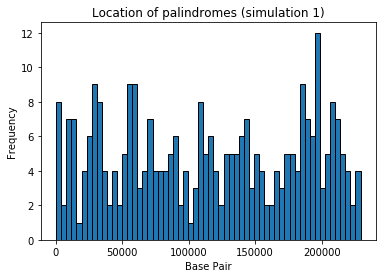

In [11]:
pd.Series(samples[0]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 1)'))
plt.xlabel("Base Pair")

Text(0.5,0,'Base Pair')

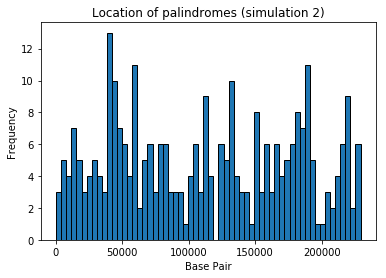

In [12]:
pd.Series(samples[1]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 2)'))
plt.xlabel("Base Pair")

Text(0.5,0,'Base Pair')

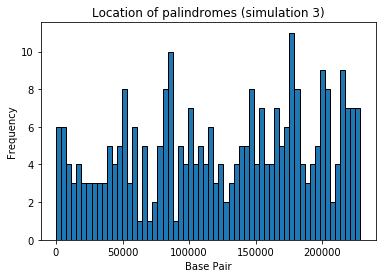

In [13]:
pd.Series(samples[2]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 3)'))
plt.xlabel("Base Pair")

In [14]:
data_1 = data_1.assign(distance_from_previouse_palindrome\
                       = data_1.location.diff().set_value(0, np.NaN))

/Users/syeehyn/anaconda3/envs/UCSD/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Text(0.5,1,'distance_from_previouse_palindrome')

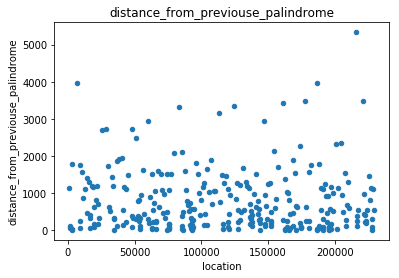

In [15]:
data_1.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
plt.title('distance_from_previouse_palindrome')

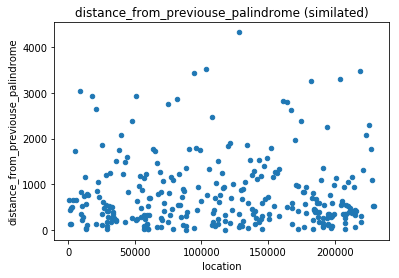

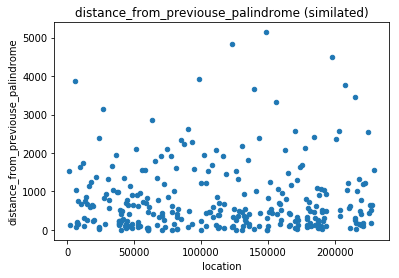

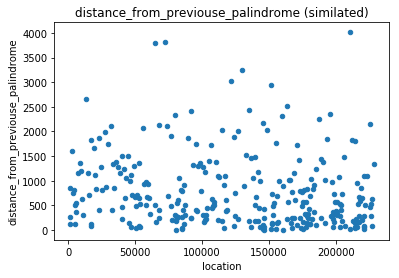

In [16]:
df_lst = []
for i in samples:
    df_lst += [
        pd.DataFrame(
                {
                    'location' : i[1:]
                }
        ).assign(distance_from_previouse_palindrome = i.diff().iloc[1:])\
    ]
for i in df_lst:
    i.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
    plt.title('distance_from_previouse_palindrome (similated)')

Text(0,0.5,'Frequency')

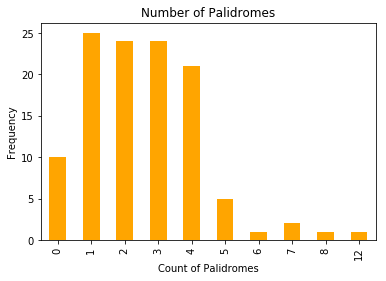

In [17]:
original = pd.cut(data_1.location, range(0, N+1, 2000)).value_counts()\
.rename('count').to_frame().groupby('count')['count'].count()
original.plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

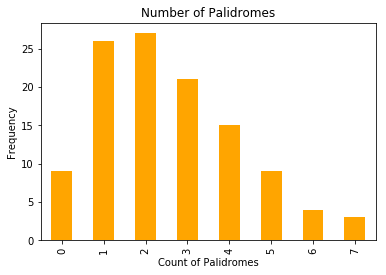

In [18]:
pd.cut(samples[0], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

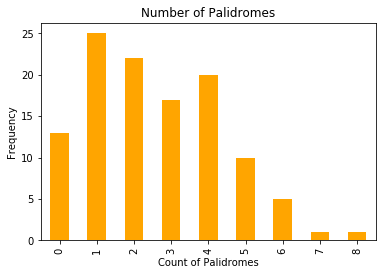

In [19]:
pd.cut(samples[1], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

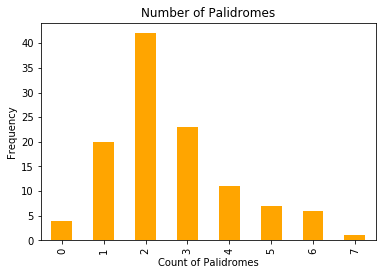

In [20]:
pd.cut(samples[2], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

# Location and Spacing

In [21]:
spacing = data_1.location.diff()
spacing_1 = pd.Series(samples[0]).diff()
spacing_2 = pd.Series(samples[1]).diff()
spacing_3 = pd.Series(samples[2]).diff()

spacingdf = pd.DataFrame(
    {
        'original_spacing' : spacing.reset_index(drop = True).sort_values(),
        'simulated_sample_1' : spacing_1.reset_index(drop = True).sort_values(),
        'simulated_sample_2' : spacing_2.reset_index(drop = True).sort_values(),
        'simulated_sample_3' : spacing_3.reset_index(drop = True).sort_values(),
    }
)

In [22]:
spacingdf.head()

,original_spacing,simulated_sample_1,simulated_sample_2,simulated_sample_3
0,NaN,NaN,NaN,NaN
1,1144.0,649.551383,1531.746308,843.130828
2,112.0,429.274005,132.362396,120.499179
3,44.0,125.780776,3869.751195,261.875771
4,1771.0,472.379801,1036.771411,1599.993656


Text(0.5,1,'spacing histogram of original data set')

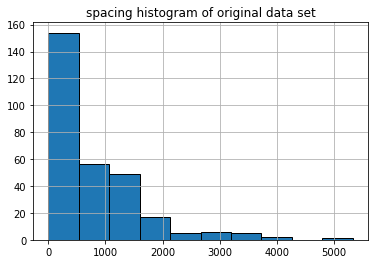

In [23]:
spacing.hist(edgecolor = 'k')
plt.title('spacing histogram of original data set')

Text(0.5,1,'spacing histogram of simulated 1 set')

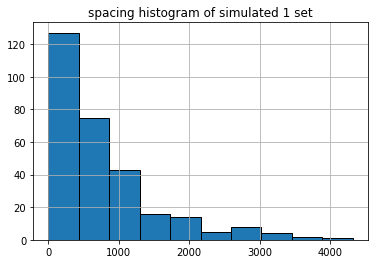

In [24]:
spacing_1.hist(edgecolor = 'k')
plt.title('spacing histogram of simulated 1 set')

Text(0.5,1,'spacing histogram of simulated 2 set')

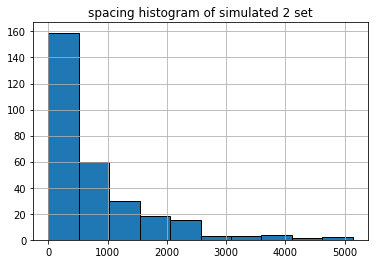

In [25]:
spacing_2.hist(edgecolor = 'k')
plt.title('spacing histogram of simulated 2 set')

Text(0.5,1,'spacing histogram of simulated 3 set')

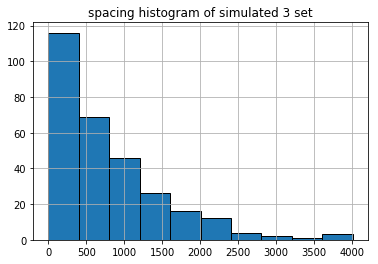

In [26]:
spacing_3.hist(edgecolor = 'k')
plt.title('spacing histogram of simulated 3 set')

In [27]:
#chi-square test

In [28]:
for i in range(1,4):
    print(stats.chisquare(spacingdf.iloc[:,0].dropna(), spacingdf.iloc[:,i].dropna()))

Power_divergenceResult(statistic=1618368.9626371735, pvalue=0.0)
Power_divergenceResult(statistic=1732022.8148725694, pvalue=0.0)
Power_divergenceResult(statistic=6504046.295521821, pvalue=0.0)


In [27]:
# Sum of two consecutive pairs, and spacing. 

In [50]:
diff_pair_table = pd.DataFrame(
    {'spacing of original data distance two pairs':data_1.location.iloc[range(0,len(data_1),2)].diff().reset_index(drop = True),
     'spacing of sample_1 data distance two pairs': samples[0].iloc[range(0,len(samples[0]),2)].diff().reset_index(drop = True),
     'spacing of sample_2 data distance two pairs': samples[1].iloc[range(0,len(samples[1]),2)].diff().reset_index(drop = True),
     'spacing of sample_3 data distance two pairs': samples[2].iloc[range(0,len(samples[2]),2)].diff().reset_index(drop = True)
    })

In [52]:
diff_pair_table.head()

,spacing of original data distance two pairs,spacing of sample_1 data distance two pairs,spacing of sample_2 data distance two pairs,spacing of sample_3 data distance two pairs
0,NaN,NaN,NaN,NaN
1,1256.0,2108.842320,365.844586,400.544237
2,1815.0,2060.750604,1049.581851,1256.690883
3,38.0,1737.027354,662.817249,1148.059178
4,5737.0,2538.071004,2706.546904,906.744404


In [35]:
diff_pair_table.columns[0]

'spacing of original data distance two pairs'

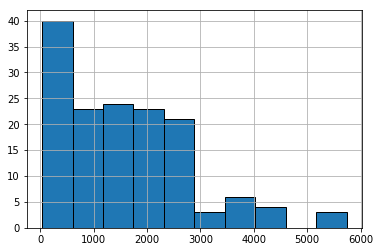

In [37]:
diff_pair_table.dropna().iloc[:,0].hist(edgecolor = 'k')
plt.title = (diff_pair_table.columns[0])

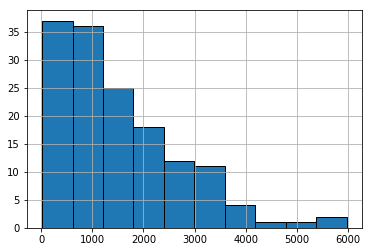

In [38]:
diff_pair_table.dropna().iloc[:,1].hist(edgecolor = 'k')
plt.title = (diff_pair_table.columns[1])

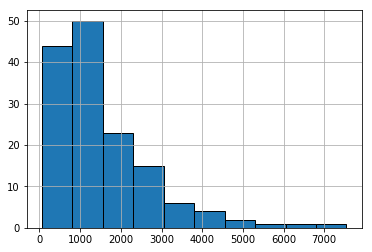

In [39]:
diff_pair_table.dropna().iloc[:,2].hist(edgecolor = 'k')
plt.title = (diff_pair_table.columns[2])

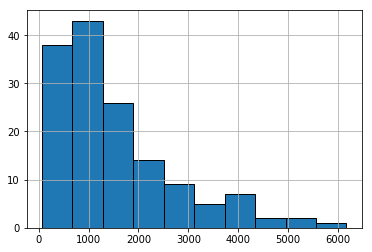

In [40]:
diff_pair_table.dropna().iloc[:,3].hist(edgecolor = 'k')
plt.title = (diff_pair_table.columns[3])

In [63]:
#chi-square test pairs
for i in range(1,4):
    print(stats.chisquare(diff_pair_table.iloc[:,0].dropna(), diff_pair_table.iloc[:,i].dropna()))

Power_divergenceResult(statistic=1108738.6153221978, pvalue=0.0)
Power_divergenceResult(statistic=427219.7504428142, pvalue=0.0)
Power_divergenceResult(statistic=407326.0174186026, pvalue=0.0)


In [62]:
diff_pair_table_1 = pd.DataFrame(
    {'spacing of original data distance three pairs':data_1.location.iloc[range(0,len(data_1),3)].diff().reset_index(drop = True),
     'spacing of sample_1 data distance three pairs': samples[0].iloc[range(0,len(samples[0]),3)].diff().reset_index(drop = True),
     'spacing of sample_2 data distance three pairs': samples[1].iloc[range(0,len(samples[1]),3)].diff().reset_index(drop = True),
     'spacing of sample_3 data distance three pairs': samples[2].iloc[range(0,len(samples[2]),3)].diff().reset_index(drop = True)
    })

In [49]:
data_1.head()

,location,distance_from_previouse_palindrome
0,177,NaN
1,1321,1144.0
2,1433,112.0
3,1477,44.0
4,3248,1771.0


In [53]:
diff_pair_table_1.head()

,spacing of original data distance three pairs,spacing of sample_1 data distance three pairs,spacing of sample_2 data distance three pairs,spacing of sample_3 data distance three pairs
0,NaN,NaN,NaN,NaN
1,1300.0,3915.743509,1152.276398,657.887412
2,1809.0,1990.876769,925.967287,2147.406885
3,5798.0,2569.319063,2719.177671,1401.431798
4,2670.0,1791.747335,2591.099276,2391.125749


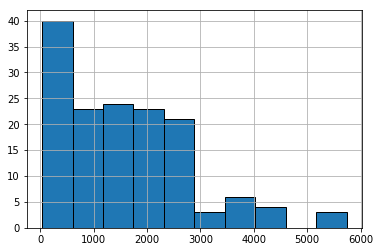

In [54]:
diff_pair_table.dropna().iloc[:,0].hist(edgecolor = 'k')
plt.title = (diff_pair_table_1.columns[0])

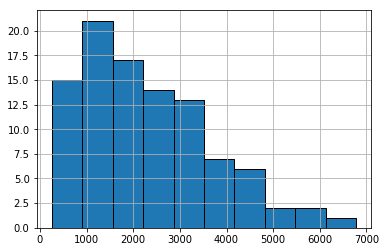

In [57]:
diff_pair_table_1.dropna().iloc[:,1].hist(edgecolor = 'k')
plt.title = (diff_pair_table_1.columns[1])

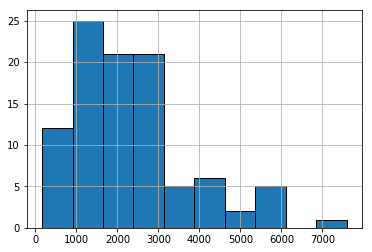

In [58]:
diff_pair_table_1.dropna().iloc[:,2].hist(edgecolor = 'k')
plt.title = (diff_pair_table_1.columns[2])

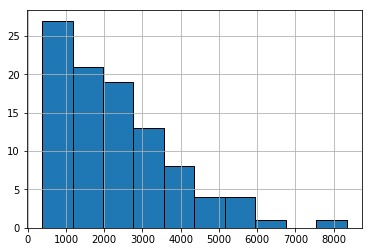

In [59]:
diff_pair_table_1.dropna().iloc[:,3].hist(edgecolor = 'k')
plt.title = (diff_pair_table_1.columns[3])

In [64]:
#chi-square test for triplet
for i in range(1,4):
    print(stats.chisquare(diff_pair_table_1.iloc[:,0].dropna(), diff_pair_table_1.iloc[:,i].dropna()))

Power_divergenceResult(statistic=467742.12524889165, pvalue=0.0)
Power_divergenceResult(statistic=206558.15227356614, pvalue=0.0)
Power_divergenceResult(statistic=305703.88263553596, pvalue=0.0)


# Counts

In [36]:
sample = samples[0] #pick our first random sample as our sample

In [37]:
for i in range(2000, 5001, 1000):
    pd.cut(data_1.location, range(0, N+1, i)).value_counts().to_frame().head(10)

In [38]:
idx = [j for i in list(zip(['orginial_data interval = {}'.format(i) for i in range(2000, 5001, 1000)],\
    ['simulated_data interval = {}'.format(i) for i in range(2000, 5001, 1000)])) for j in i]
    
    

In [39]:
output = pd.DataFrame(index = idx, columns = range(1, 21))

In [40]:
for i in range(2000, 5001, 1000):
    original = pd.cut(data_1.location, range(0, N+1, i)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count()
    simulated = pd.cut(sample, range(0, N+1, i)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count()
    for j in original.index:
        output.loc['orginial_data interval = {}'.format(i),j] = original.loc[j]
    for j in simulated.index:
        output.loc['simulated_data interval = {}'.format(i),j] = simulated.loc[j]

In [41]:
output = output.drop(0, axis = 1).fillna(0)

In [42]:
output

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
orginial_data interval = 2000,25,24,24,21,5,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0
simulated_data interval = 2000,21,30,27,20,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
orginial_data interval = 3000,11,8,18,11,11,10,1,3,0,1,0,0,1,0,0,0,0,0,0,0
simulated_data interval = 3000,4,12,19,13,12,12,1,1,0,0,1,0,0,0,0,0,0,0,0,0
orginial_data interval = 4000,5,2,8,10,9,8,5,4,4,0,1,0,0,1,0,0,0,0,0,0
simulated_data interval = 4000,1,1,11,11,10,8,6,6,3,0,0,0,0,0,0,0,0,0,0,0
orginial_data interval = 5000,2,1,5,6,4,4,5,9,5,2,0,1,0,0,0,0,0,1,0,0
simulated_data interval = 5000,0,1,4,3,5,12,5,9,2,1,3,0,0,0,0,0,0,0,0,0


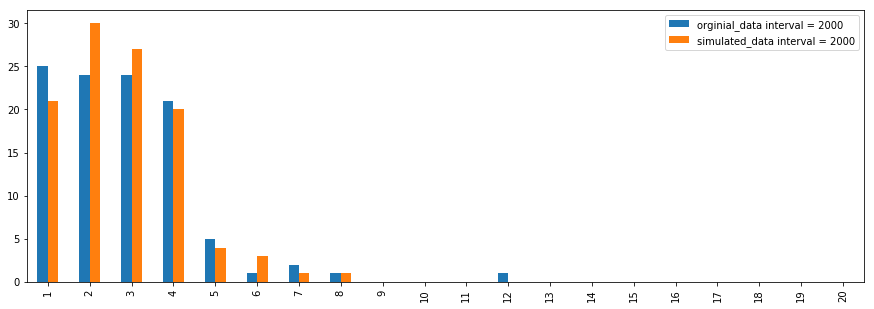

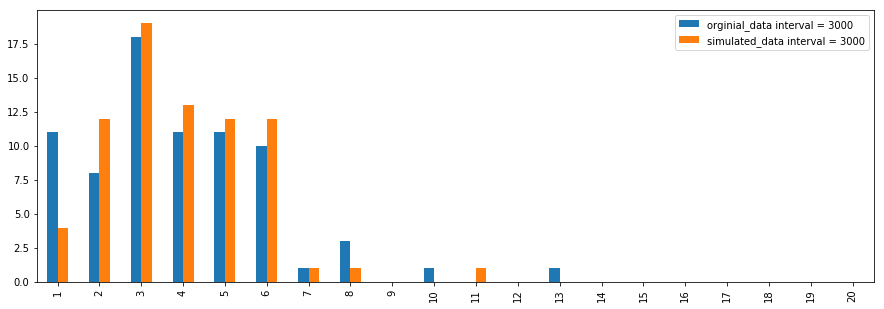

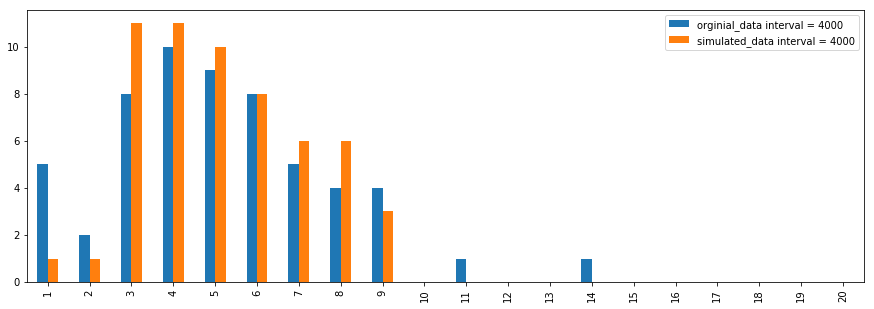

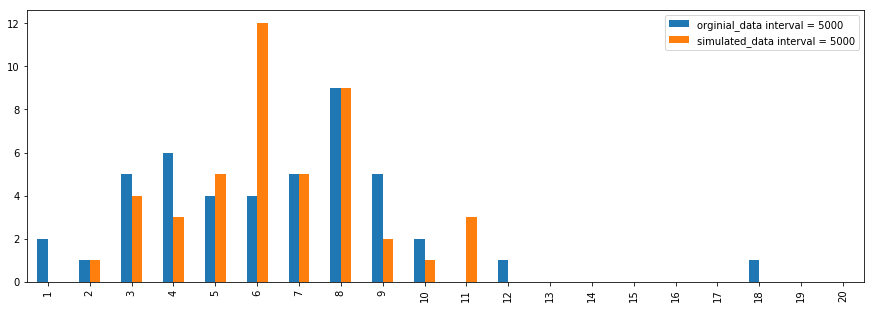

In [43]:
for i in range(0,len(output),2):
#     fig = plt.figure() # Create matplotlib figure
#     ax = fig.add_subplot(111) # Create matplotlib axes
#     ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#     width = 0.4
    
    
    
    t1 = output.iloc[i:i+2]
    #t2 = output.iloc[i+1]
    t1.T.plot(kind='bar', figsize=(15,5))
    #t2.plot(kind='bar', figsize=(15,5))
    plt.show()

In [44]:
#Performing chi-square test for count
from scipy.stats import chisquare

In [45]:
obs = output.iloc[0:11:2]
exp = output.iloc[1:11:2]

In [46]:
# We choosing the first 0 - 8 counts to roughly enlimulate outliers, making the chi-suqure test not too greedy

In [47]:
for i in range(len(obs)):
    print('with interval = {}, performing chi-square test, p-val is: '.format((i+1)*1000 + 1000))
    print(chisquare(obs.iloc[i,:8], exp.iloc[i,:8])[1])

with interval = 2000, performing chi-square test, p-val is: 
0.6686797346734374
with interval = 3000, performing chi-square test, p-val is: 
0.01044586151742727
with interval = 4000, performing chi-square test, p-val is: 
0.00869555804697669
with interval = 5000, performing chi-square test, p-val is: 
0.0


/Users/syeehyn/anaconda3/envs/UCSD/lib/python3.6/site-packages/scipy/stats/stats.py:4653: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


In [48]:
# P-Val is very small

In [49]:
# ploting standardlize residuals

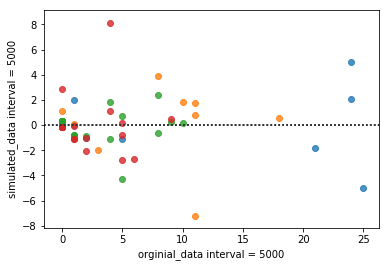

In [50]:
import seaborn as sns
for i in range(len(obs)):
    sns.residplot(obs.iloc[i], exp.iloc[i])


# The Biggest Cluster

In [51]:
#bins
bins = [40, 60, 80, 100, 120]

In [52]:
out = pd.DataFrame(index = bins, columns = ['lambda', 'interval_width', 'probability', 'maximum', 'prediction_interval'])
for i in bins:
    interval = N//i
    k = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').max()
    x_bar = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').mean()
    pred = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').idxmax()
    P = (x_bar**(k)/ np.math.factorial((k))) * np.exp(-x_bar)
    out.loc[i] = x_bar, interval, P, k, pred

In [53]:
out

,lambda,interval_width,probability,maximum,prediction_interval
40,7.4,5733,0.00510737,15,"(91728, 97461]"
60,4.93333,3822,0.000417868,14,"(91728, 95550]"
80,3.7,2866,2.5558e-05,14,"(91712, 94578]"
100,2.96,2293,1.1143e-05,13,"(91720, 94013]"
120,2.46667,1911,1.70567e-06,13,"(91728, 93639]"


# Advance, how would you advice biologist?

In [264]:
# using machine learning algorithm to create our model, and validate with the random samples
# from the analysis above we using bin = 60 as our standard of best clusifier.

In [280]:
# if fitting with random data we get high score, then we cannot reject the null hypothesis.
# Otherwide, we can confidently justify our hypothesis

In [275]:
ml_interval = out['prediction_interval'].iloc[1]

In [276]:
ml_data = data_1.fillna(0)

In [277]:
ss = data_1.location.apply(lambda x: 1 if x in (ml_interval) else 0)

In [279]:
ml_data['target'] = ss

In [284]:
X = ml_data.drop('target', axis = 1)
y = ml_data.target

In [285]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [286]:
V = GaussianMixture()

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [288]:
V.fit(X_train, y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [289]:
V.score(X_test,y_test)

-20.496852656649484